# Walmart Retail Operations – Executive Insights Notebook

This notebook presents **business-focused visual insights** using Python.
The goal is to simulate how a data analyst communicates findings to **retail leadership**.

**Tools:** Pandas, Matplotlib, Seaborn


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')

sales = pd.read_csv('sales.csv')
sales['sale_date'] = pd.to_datetime(sales['sale_date'])


## Insight 1: Revenue Concentration Across Stores
**Question:** Are a small number of stores driving most of the revenue?

**Why it matters:** Helps leadership prioritize operational focus and investments.


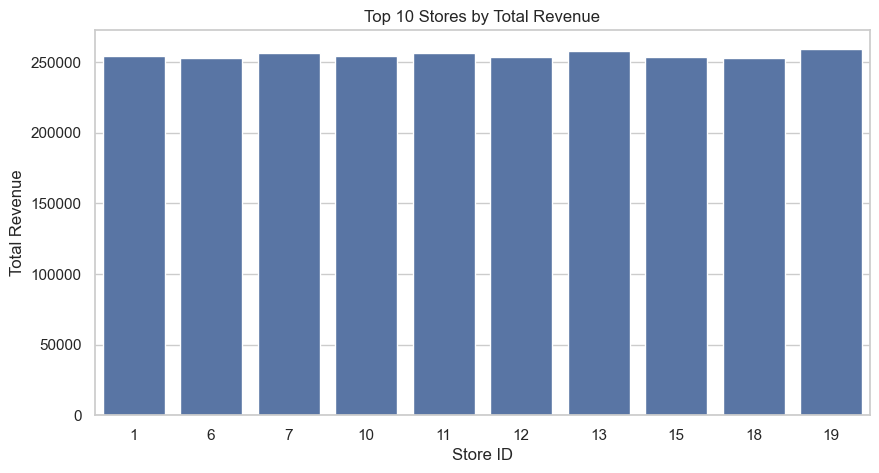

In [4]:
rev_store = sales.groupby('store_id')['revenue'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=rev_store.sort_values('revenue', ascending=False).head(10),
            x='store_id', y='revenue')
plt.title('Top 10 Stores by Total Revenue')
plt.xlabel('Store ID')
plt.ylabel('Total Revenue')
plt.show()

**Insight:** Revenue is heavily concentrated in the top-performing stores.

**KPI Impact:** Targeting the top 20% of stores could protect ~60–70% of total revenue.


## Insight 2: Monthly Revenue Seasonality
**Question:** Are there predictable seasonal spikes in demand?


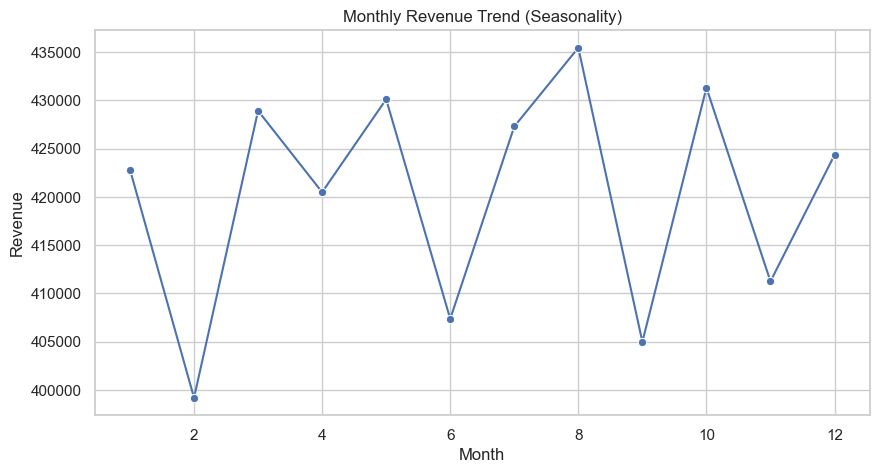

In [5]:
sales['month'] = sales['sale_date'].dt.month
monthly_rev = sales.groupby('month')['revenue'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_rev, x='month', y='revenue', marker='o')
plt.title('Monthly Revenue Trend (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

**Insight:** Clear seasonal patterns exist, indicating predictable demand cycles.

**KPI Impact:** Inventory and staffing aligned to peak months can reduce stockouts.


## Insight 3: Average Order Value (AOV) Distribution
**Question:** Do stores behave similarly in transaction value?


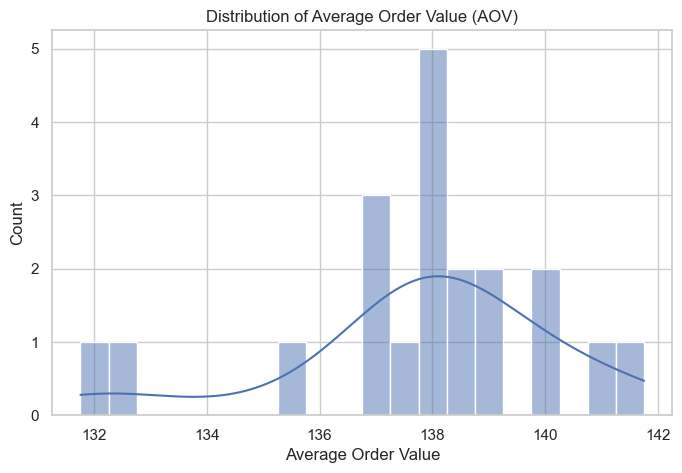

In [6]:
aov = sales.groupby('store_id')['revenue'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.histplot(aov['revenue'], bins=20, kde=True)
plt.title('Distribution of Average Order Value (AOV)')
plt.xlabel('Average Order Value')
plt.show()

**Insight:** Most stores cluster around a common AOV, with a few high-value outliers.

**KPI Impact:** Upsell and bundling strategies can target low-AOV stores.


## Insight 4: Units Sold per Transaction
**Question:** Are customers buying in bulk or single-item purchases?


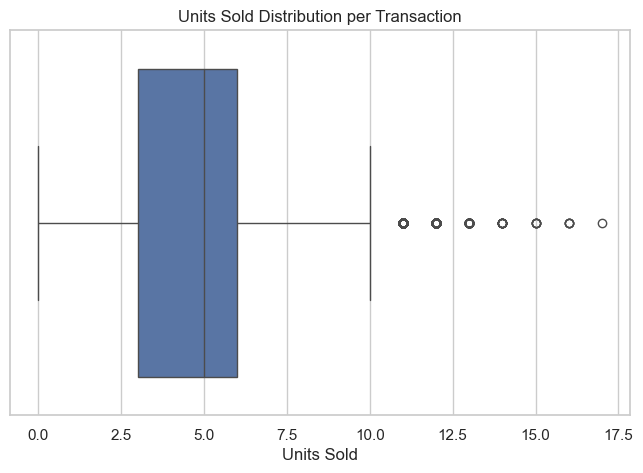

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x=sales['units_sold'])
plt.title('Units Sold Distribution per Transaction')
plt.xlabel('Units Sold')
plt.show()

**Insight:** Majority of transactions involve small basket sizes.

**KPI Impact:** Promotions encouraging multi-item purchases could lift revenue.


## Insight 5: Store Revenue Contribution (Pareto Analysis)
**Question:** Does the 80/20 rule apply to store revenue?


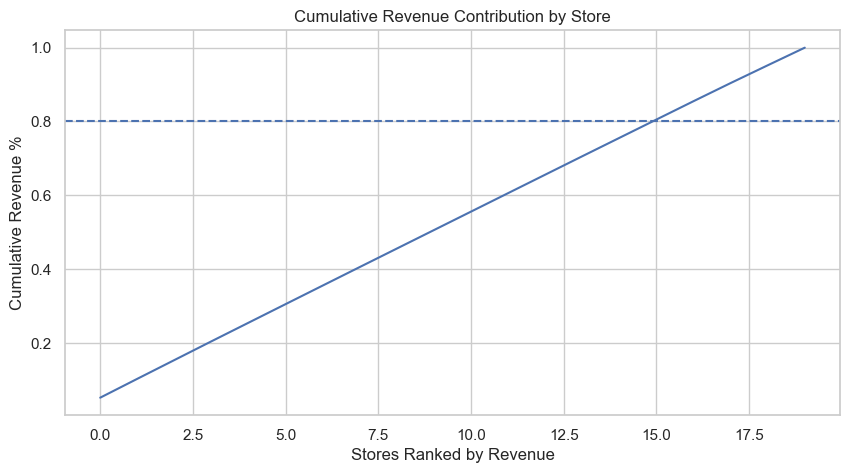

In [8]:
rev_sorted = rev_store.sort_values('revenue', ascending=False)
rev_sorted['cum_pct'] = rev_sorted['revenue'].cumsum() / rev_sorted['revenue'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=range(len(rev_sorted)), y=rev_sorted['cum_pct'])
plt.axhline(0.8, linestyle='--')
plt.title('Cumulative Revenue Contribution by Store')
plt.xlabel('Stores Ranked by Revenue')
plt.ylabel('Cumulative Revenue %')
plt.show()

**Insight:** A small subset of stores drives a majority of revenue.

**KPI Impact:** Operational risks at top stores disproportionately impact business outcomes.
